# Digit Recognizer Data Analysis

**import libraries**

In [98]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import ndimage
import tensorflow as tf
import tensorflow.keras as keras

tf.__version__

'2.1.0'

**load csv raw dataset**

In [2]:
raw_train = pd.read_csv('./data/train.csv', encoding='utf-8')
raw_test = pd.read_csv('./data/test.csv', encoding='utf-8')

# Exploring Dataset

### 1. shape of data

**Train Dataset**  
(42000, 785)
    
**Test Dataset**  
(28000, 784)

In [3]:
raw_train.shape

(42000, 785)

In [4]:
raw_test.shape

(28000, 784)

### 2. Columns of dataset

* Train Dataset and Test Dataset all has pixels of image
* Train Dataset and label for each image

In [8]:
raw_train.columns

Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=785)

In [9]:
raw_test.columns

Index(['pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6',
       'pixel7', 'pixel8', 'pixel9',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=784)

## Modeling

In [94]:
def data_augmentation(x_train, y_train):
    aug_x_train = list()
    aug_y_train = list()
    
    for x, y in zip(x_train, y_train):
        aug_x_train.append(x)
        aug_y_train.append(y)
    
        cval = np.median(x)
    
        for _ in range(4):        
            angle = np.random.randint(-15, 15, 1)
            rot_x = ndimage.rotate(x, angle[0], reshape=False, cval=cval)

            shift = np.random.randint(-2, 2, 2)
            shift_x = ndimage.shift(rot_x, shift, cval=cval)
            
            aug_x_train.append(shift_x)
            aug_y_train.append(y)

    aug_x_train = np.array(aug_x_train)
    aug_y_train = np.array(aug_y_train)
            
    return aug_x_train, aug_y_train

In [95]:
def load_digit():
    train = pd.read_csv('./data/train.csv', encoding='utf-8')
    test = pd.read_csv('./data/test.csv', encoding='utf-8')
    
    x_train = train.loc[:, 'pixel0':]
    y_train = train.loc[:, 'label']
    x_test = test.loc[:, 'pixel0':]
    
    x_train = np.array(x_train)
    y_train = np.array(y_train)
    
    x_test = np.array(x_test)

    x_train = np.reshape(x_train, (-1, 28, 28))
    x_test = np.reshape(x_test, (-1, 28, 28))

    x_train, y_train = data_augmentation(x_train, y_train)
    
    x_train = x_train / 255.0
    x_test = x_test / 255.0
    
    y_train = tf.one_hot(y_train, 10)

    return (x_train, y_train), (x_test)

In [96]:
(x_train, y_train), (x_test) = load_digit()
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)

(210000, 28, 28)
(210000, 10)
(28000, 28, 28)


***Print Sample Data Augmented***


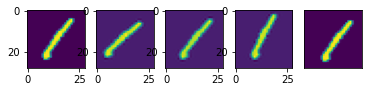

In [106]:
print('***Print Sample Data Augmented***')

for idx in range(1, 6):
    plt.subplot(1, 5, idx)
    plt.imshow(x_train[idx-1])

plt.xticks([])
plt.yticks([])
plt.show()